In [102]:
# 문제 1. 데이터 불러오기
# 2011년 3월 21일 오전 6시의 습도, 현지기압, 기온, 이슬점 온도를 추출하세요.
# 추출된 값들의 합을 구하세요.

import pandas as pd

data = pd.read_csv("gts-seoul.csv")
tmp = data[data["일시"] == "2011-03-21 06:00"]
tmp[["습도", "풍속", "현지기압", "기온", "이슬점 온도"]].sum(axis=1)

2101    1038.9
dtype: float64

In [103]:
# 문제 2. 데이터 전처리하기
# 남은 행의 수 + 평균 습도 + 최대 풍속 + 최저 기온의 값을 계산하여 제출 (셋째자리에서 반올림하여 둘째자리까지 제출)
# - 습도, 풍속, 현지기압, 기온, 이슬점 온도 열(column) 추출하기
# - nan를 포함하는 행 지우기 (dropna 이용)

data = data[["습도", "풍속", "현지기압", "기온", "이슬점 온도"]]
data = data.dropna() # dropna는 nan값을 포함하는 행을 지워줌 (32068로 줄어듦)
data

a = data.shape[0] # 행의 수
b = data['습도'].mean() # 퍙균 습도
c = data['풍속'].max() # 최대 풍속
d = data['기온'].min() # 최저 기온

print(a, b, c, d)

32068 59.02161968317325 19.0 -17.6


In [104]:
# 문제 3-1. 습도, 풍속, 현지기압, 기온과 이슬점 온도의 상관계수를 각각 구하세요.

def corr(a, b):
    a = a - a.mean()
    b = b - b.mean()

    # cosine smilarity
    # (a * b) / |a||b|
    return (a * b).sum() / (((a*a).sum() ** 0.5) * ((b*b).sum() ** 0.5))

a = corr(data['습도'], data['이슬점 온도'])
b = corr(data['풍속'], data['이슬점 온도'])
c = corr(data['현지기압'], data['이슬점 온도'])
d = corr(data['기온'], data['이슬점 온도'])
print(a, b, c, d)

0.5721226831001317 -0.08680173999760286 -0.20970152226101682 0.9035827918403053


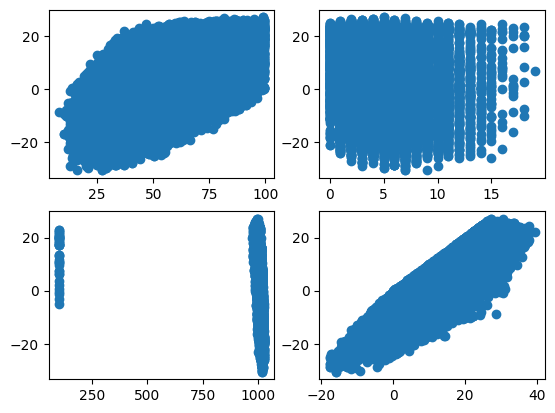

In [105]:
# 문제 3-2. 이슬점 온도를 y축 나머지를 x축으로 하여 산점도를 그려라

import matplotlib.pyplot as plt

plt.subplot(2, 2, 1)

plt.scatter(data['습도'], data['이슬점 온도'])
plt.subplot(2, 2, 2)
plt.scatter(data['풍속'], data['이슬점 온도'])
plt.subplot(2, 2, 3)
plt.scatter(data['현지기압'], data['이슬점 온도'])
plt.subplot(2, 2, 4)
plt.scatter(data['기온'], data['이슬점 온도'])
plt.show()

In [106]:
# 문제 3-3. 이상치 제거
# 현지기압이 200보다 낮은 데이터를 제거

data = data[data['현지기압'] > 200]
data

,습도,풍속,현지기압,기온,이슬점 온도
0,70.7,3.0,995.0,25.0,19.3
1,61.8,3.0,993.9,27.9,19.9
2,49.7,3.0,992.3,30.5,18.8
3,66.8,6.0,992.1,28.8,22.0
4,79.6,4.0,993.4,26.3,22.5
...,...,...,...,...,...
32080,65.7,11.0,987.0,21.7,15.0
32081,83.8,5.0,989.7,18.9,16.1
32082,84.9,7.0,991.2,18.8,16.2
32083,85.9,4.0,991.7,18.4,16.0


In [107]:
# 상관계수 다시 구하기

a = corr(data['습도'], data['이슬점 온도'])
b = corr(data['풍속'], data['이슬점 온도'])
c = corr(data['현지기압'], data['이슬점 온도'])
d = corr(data['기온'], data['이슬점 온도'])
print(a, b, c, d)

0.5721221451072883 -0.08681412771332694 -0.7701750683144204 0.9035922524679421


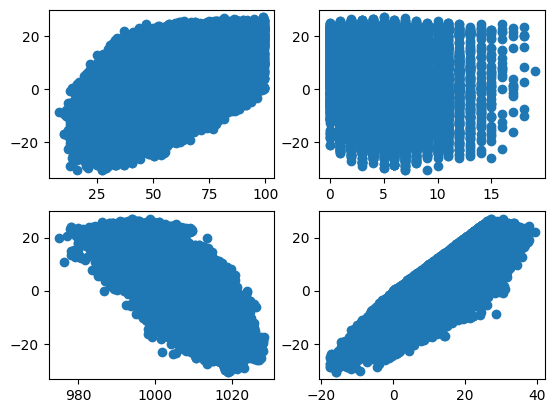

In [108]:
# 산점도 다시 그리기
plt.subplot(2, 2, 1)

plt.scatter(data['습도'], data['이슬점 온도'])
plt.subplot(2, 2, 2)
plt.scatter(data['풍속'], data['이슬점 온도'])
plt.subplot(2, 2, 3)
plt.scatter(data['현지기압'], data['이슬점 온도'])
plt.subplot(2, 2, 4)
plt.scatter(data['기온'], data['이슬점 온도'])
plt.show()

In [109]:
# 문제 4-1. 이슬점 온도 계산 공식 구하기
# 이슬점 온도 = a * 습도 + b * 풍속 + c * 현지기압 + d * 기온 + e

from sklearn.linear_model import LinearRegression

model = LinearRegression()

X = data[['습도', '풍속', '현지기압', '기온']]
Y = data['이슬점 온도']

model.fit(X, Y)

model.coef_ # w
model.intercept_ # b

print(model.coef_, model.intercept_) # 풍속이랑 현지기압은 거의 영향을 미치지 않는 것을 확인할 수 있음.

print("0.2676329:-0.03078923:0.00952646:0.92936961:-32.91662937402052")

[ 0.2676329  -0.03078923  0.00952646  0.92936961] -32.91662937402052
0.2676329:-0.03078923:0.00952646:0.92936961:-32.91662937402052


In [110]:
# 문제 4-2. MSE 구하기

model.predict(X) # 예측값

((model.predict(X) - Y) ** 2).mean()

1.168514629572586